# **Bank Customer Churn Prediction**

In [75]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('bank.data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

In [76]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
#check the unique value
churn_df.nunique()

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2
dtype: int64

In [78]:
y = churn_df['Exited']

In [79]:
# check missing values
churn_df.isnull().sum()

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 0
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0
dtype: int64

**There are no missing values in the data.**

In [80]:
#check the description of the meaningful data
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


**Before making a formal prediction of customer churn, it is necessary to find what factors are related to customer churn.**

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

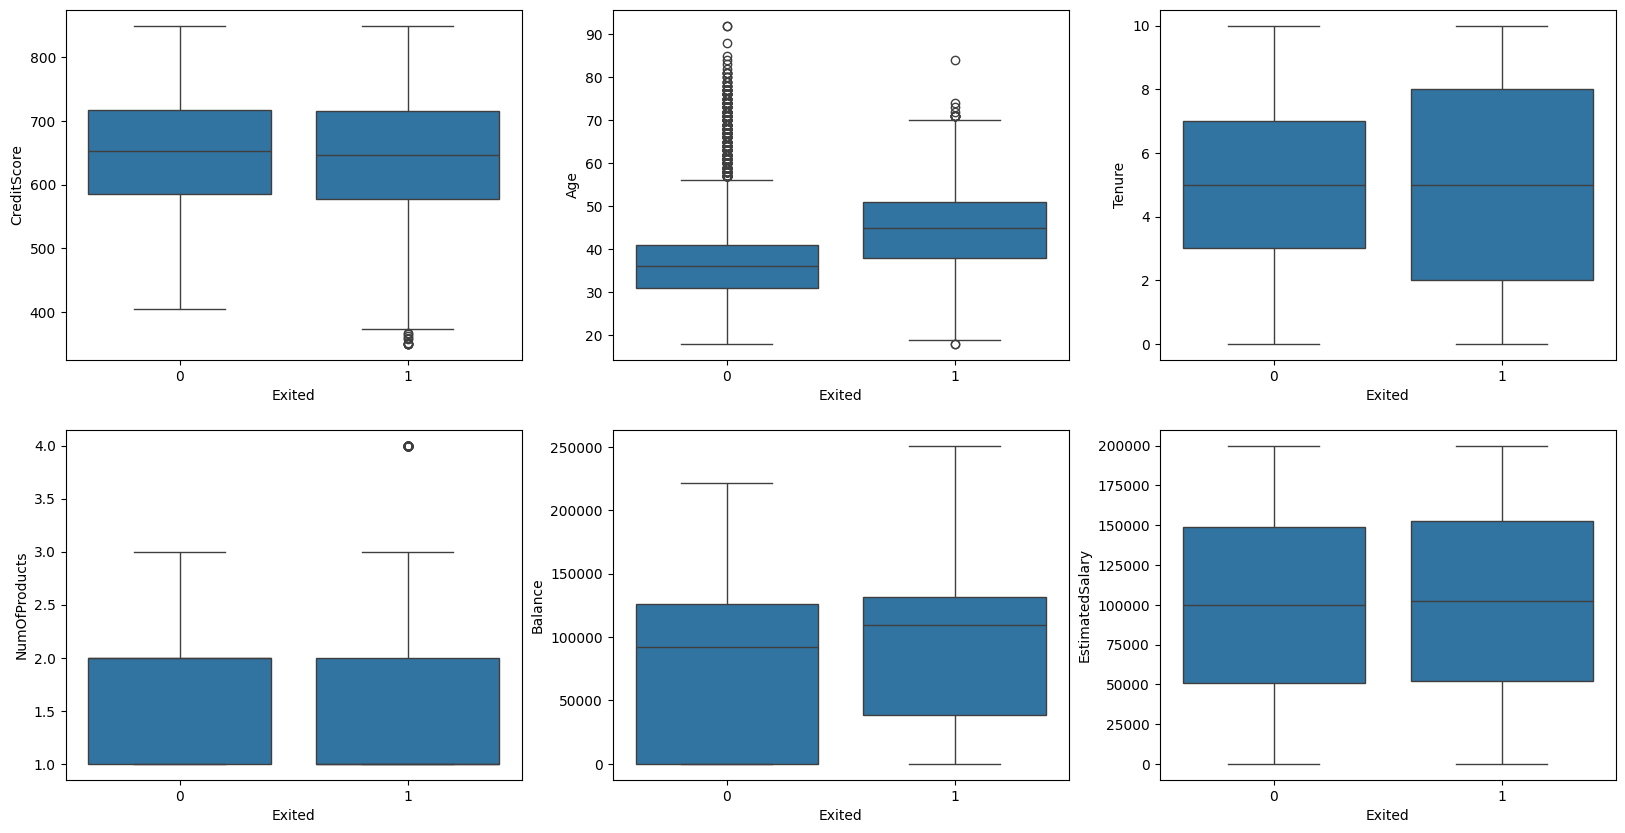

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

Relatively speaking, the difference between customer churn and credit score, numbers of products, and estimated salary is not significant. For age, users with existing=1 are generally older, which is reflected in a larger average value; For tenure, the difference between the maximum and minimum values of tenure for churn users is greater than that for non-churn users; For balance, the average value of lost users is larger than that of non-lost users, and the lower limit of balance is also higher.

<Axes: xlabel='Exited', ylabel='count'>

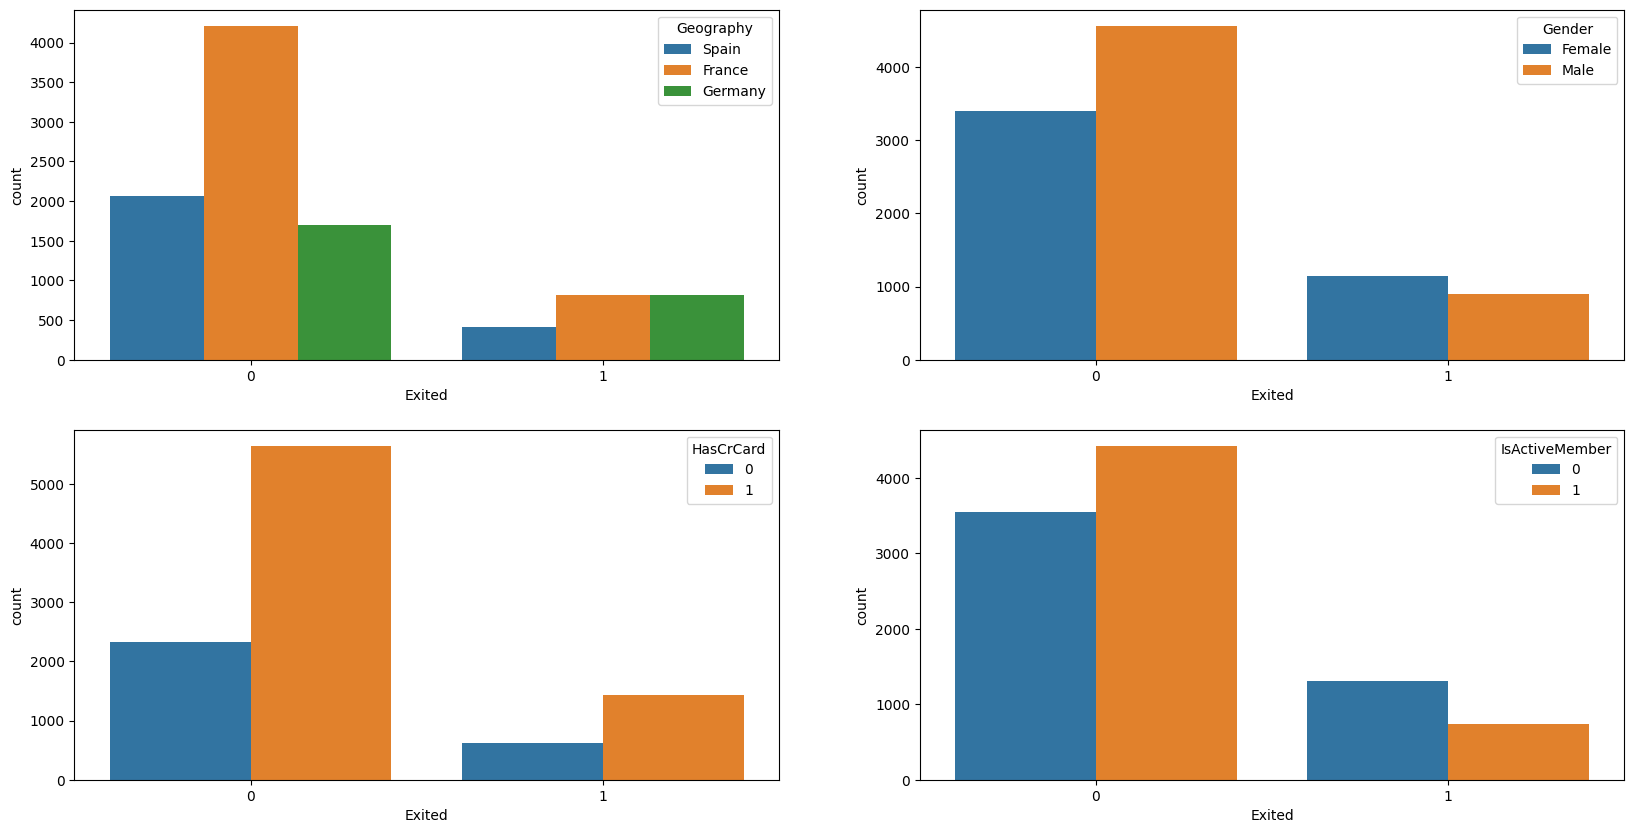

In [82]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

As shown in the figure, geography has relatively large data differences, which is reflected in the significant decrease in the proportion of French users and the significant increase in the proportion of Germans among the lost users. In terms of gender, unlike the situation where there are more men than women who have not lost customers, there is a phenomenon of more women than men among lost customers. Among the non-lost customers, there are more active members, while among the lost customers, the opposite is true. Overall, the difference in HasCrCard factor between non-lost and lost customers is not significant.

# Part 2: Feature Preprocessing

In [83]:
#firstly,drop the useless data
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [84]:
X.dtypes

CreditScore int64
Geography object
Gender object
Age int64
Tenure int64
Balance float64
NumOfProducts int64
HasCrCard int64
IsActiveMember int64
EstimatedSalary float64
dtype: object

**There are two types of data in the data that are 'object', so it is necessary to encode and process these two types of data. In order to prevent the early leakage of test data, we need to split the data in advance**

In [85]:
from sklearn import model_selection

# take the 20% of data as the test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 100)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 10 features
test data has 2000 observation with 10 features


In [86]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1814,579,Germany,Male,31,2,90547.48,2,1,1,18800.13
4060,640,France,Female,29,4,0.00,2,1,0,44904.26
797,488,Germany,Male,32,3,114540.38,1,1,0,92568.07
5158,587,France,Male,55,9,0.00,1,1,0,64593.07
7950,516,Germany,Female,33,10,138847.90,1,1,1,127256.70


In [87]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [88]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,579,Male,31,2,90547.48,2,1,1,18800.13,0.0,1.0,0.0
1,640,Female,29,4,0.00,2,1,0,44904.26,1.0,0.0,0.0
2,488,Male,32,3,114540.38,1,1,0,92568.07,0.0,1.0,0.0
3,587,Male,55,9,0.00,1,1,0,64593.07,1.0,0.0,0.0
4,516,Female,33,10,138847.90,1,1,1,127256.70,0.0,1.0,0.0


In [89]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [90]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,579,1.0,31,2,90547.48,2,1,1,18800.13,0.0,1.0,0.0
1,640,0.0,29,4,0.00,2,1,0,44904.26,1.0,0.0,0.0
2,488,1.0,32,3,114540.38,1,1,0,92568.07,0.0,1.0,0.0
3,587,1.0,55,9,0.00,1,1,0,64593.07,1.0,0.0,0.0
4,516,0.0,33,10,138847.90,1,1,1,127256.70,0.0,1.0,0.0


In [91]:
#Standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [92]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.742143,1.0,-0.759580,-1.041356,0.218456,0.810522,0.641624,0.973355,-1.416909,0.0,1.0,0.0
1,-0.109587,0.0,-0.950738,-0.350658,-1.231696,0.810522,0.641624,-1.027375,-0.961432,1.0,0.0,0.0
2,-1.685793,1.0,-0.664000,-0.696007,0.602712,-0.905777,0.641624,-1.027375,-0.129771,0.0,1.0,0.0
3,-0.659185,1.0,1.534320,1.376085,-1.231696,-0.905777,0.641624,-1.027375,-0.617892,1.0,0.0,0.0
4,-1.395439,0.0,-0.568421,1.721434,0.992006,-0.905777,0.641624,0.973355,0.475492,0.0,1.0,0.0


# Part 3: Model Training and Result Evaluation

In [93]:
#build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [94]:
# Train the model
classifier_logistic.fit(X_train, y_train)
classifier_RF.fit(X_train,y_train)
classifier_KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [95]:
# Prediction of logistic regression
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
# Prediction of KNN
classifier_KNN.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
# Prediction of random forest
classifier_RF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

**In order to prevent overfitting as well as find the best model,we need to find a better parameter**

In [98]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [99]:
#Logistic Regression（Regularization）
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)

Best score: 0.814875
Best parameters set:
C:0.05
penalty:l1


In [100]:
best_LR_model = Grid_LR.best_estimator_

In [101]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
best_LR_model.score(X_test, y_test)

0.802

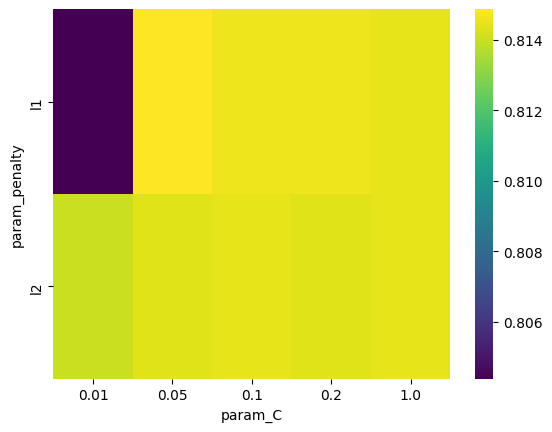

In [103]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

It can be seen that there is a difference in the performance of different C values under L1 and L2, with the best performance at l1 and C=0.01, which is 0.802 as mentioned above

In [104]:
#KNN
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)

Best score: 0.844
Best parameters set:
n_neighbors:9


In [105]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [106]:
best_KNN_model.score(X_test, y_test)

0.8385

In [107]:
#Random Forest
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)

Best score: 0.866375
Best parameters set:
max_depth:10
n_estimators:80


In [108]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model.score(X_test, y_test)

0.862

In [109]:
Prediction_logistic = best_LR_model.predict(X_test)
Prediction_KNN = best_KNN_model.predict(X_test)
Prediction_RF = best_RF_model.predict(X_test)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Prediction_logistic))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1593
           1       0.54      0.16      0.25       407

    accuracy                           0.80      2000
   macro avg       0.68      0.56      0.57      2000
weighted avg       0.76      0.80      0.76      2000



In [111]:
print(classification_report(y_test, Prediction_KNN))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.71      0.35      0.47       407

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000



In [112]:
print(classification_report(y_test, Prediction_RF))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



Overall, in terms of precision, recall, accuracy, and score, Random Forest performs the best among the three models.

### ROC curve

In [113]:
#RF
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [114]:
best_RF_model.predict_proba(X_test)

array([[0.9114791 , 0.0885209 ],
 [0.96722352, 0.03277648],
 [0.81435048, 0.18564952],
 ...,
 [0.9715471 , 0.0284529 ],
 [0.89566671, 0.10433329],
 [0.12115656, 0.87884344]])

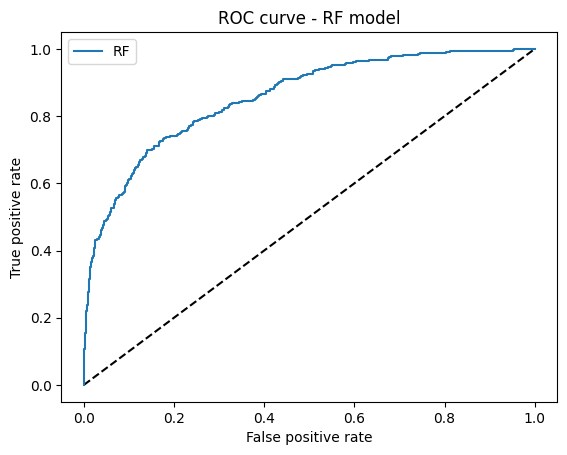

In [115]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [116]:
from sklearn import metrics

# AUC score
AUC_RF = metrics.auc(fpr_rf,tpr_rf)
AUC_RF

0.8569555688199756

In [117]:
#LG
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [118]:
best_LR_model.predict_proba(X_test)

array([[0.91112231, 0.08887769],
 [0.83973613, 0.16026387],
 [0.76690168, 0.23309832],
 ...,
 [0.95028314, 0.04971686],
 [0.87748016, 0.12251984],
 [0.769652 , 0.230348 ]])

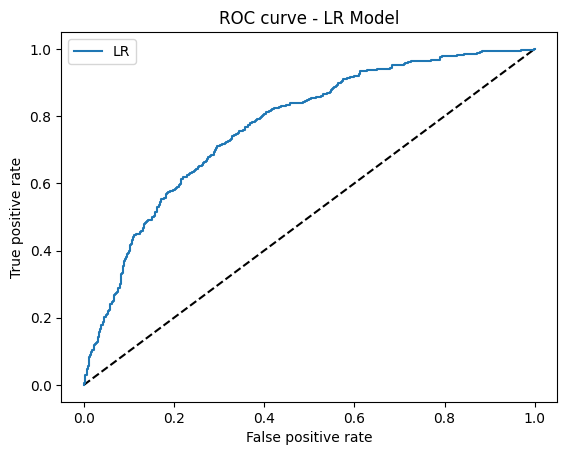

In [119]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [120]:
# AUC score
AUC_LR = metrics.auc(fpr_lr,tpr_lr)
AUC_LR

0.7703882619136856

In [121]:
#KNN
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn,thresh_ = roc_curve(y_test, y_pred_knn)

In [122]:
best_KNN_model.predict_proba(X_test)

array([[0.77777778, 0.22222222],
 [1. , 0. ],
 [0.77777778, 0.22222222],
 ...,
 [1. , 0. ],
 [0.77777778, 0.22222222],
 [0.44444444, 0.55555556]])

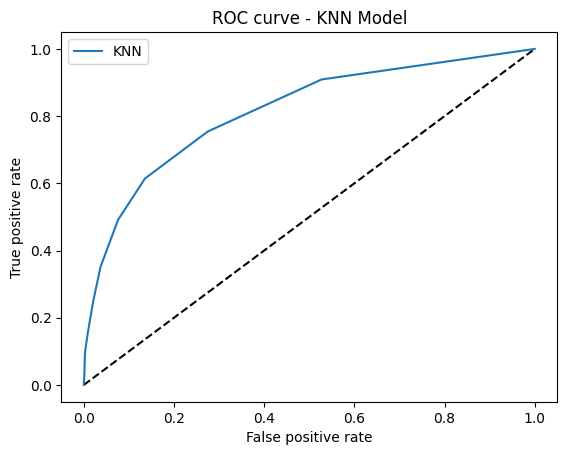

In [123]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [124]:
# AUC score
AUC_KNN = metrics.auc(fpr_knn,tpr_knn)
AUC_KNN

0.8140027546807209

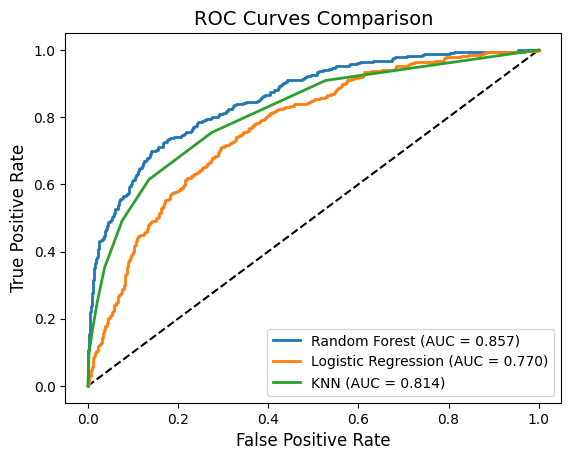

In [125]:
#comparison
from sklearn.metrics import roc_curve, auc
plt.figure(1)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {AUC_RF:.3f})', linewidth=2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {AUC_LR:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {AUC_KNN:.3f})', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14)
plt.legend(loc='best')

plt.show()

Although the LR model performs better than KNN at lower thresholds,RF performs better than KNN overall, and both are better than LR. This can also be seen from AUC.

# Part 4: Model Extra Functionality

In [126]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
X_with_corr['SalaryInRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,648632.832
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,720272.512
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,729162.048
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,600490.432
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,506138.240


In [127]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


**It is not difficult to find from the above analysis that Random Forest performs the best among the three models, so we will first rank this model based on feature importance**

In [128]:
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2378
Balance : 0.1448
EstimatedSalary : 0.1444
CreditScore : 0.1408
NumOfProducts : 0.1322
Tenure : 0.0818
IsActiveMember : 0.0403
Geography_Germany : 0.0224
Gender : 0.0188
HasCrCard : 0.0186


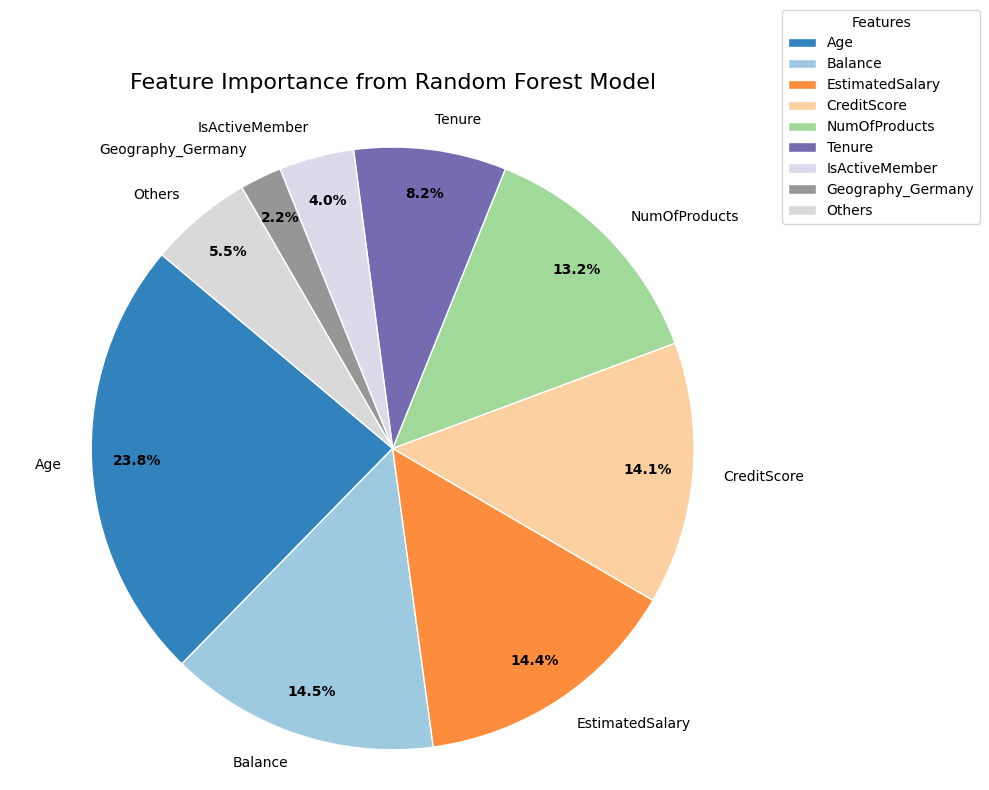

In [129]:
# draw a pie
plt.figure(figsize=(10, 8))
features = X_RF.columns[indices]
importance_values = importances[indices]

threshold = 0.02
significant_features = features[importance_values > threshold]
significant_importances = importance_values[importance_values > threshold]
other_importance = sum(importance_values[importance_values <= threshold])

if other_importance > 0:
    significant_features = np.append(significant_features, 'Others')
    significant_importances = np.append(significant_importances, other_importance)

colors = plt.cm.tab20c(np.linspace(0, 1, len(significant_importances)))

wedges, texts, autotexts = plt.pie(
    significant_importances,
    labels=significant_features,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

plt.title('Feature Importance from Random Forest Model', fontsize=16, pad=20)

plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

plt.legend(
    wedges,
    significant_features,
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0.5, 0.5, 1),
    fontsize=10
)

plt.axis('equal')
plt.tight_layout()
plt.show()

It can be seen that age has the greatest impact, followed by estimated salary, credit score, balance, num of products, and tenure, which is roughly consistent with the initial results of EDA.

# Part 5:Practical Business

#### This is a simple practice.The main function is to first store the data of a batch of new customers in today. csv, predict whether this batch of new customers will be lost through the model, and finally store the predicted customers who may be lost in warning. csv, so that the bank can carry out subsequent retention work for these customers based on the information in the warning.

In [130]:
#clean the warning.csv
warning = pd.DataFrame()
warning.to_csv('warning.csv')

In [131]:
#choose to use Random Forest
churn_df_new = pd.read_csv('today.csv')
X_new = churn_df_new.drop(to_drop, axis = 1)
y_new = churn_df_new['Exited']
churn_df_new.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
1,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
2,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
3,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
4,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0


In [132]:
X_new = OneHotEncoding(X_new, enc_ohe, ['Geography'])
X_new[categories]=enc_oe.transform(X_new[categories])
X_new.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,528,1.0,31,6,102016.72,2,0,0,80181.12,1.0,0.0,0.0
1,497,1.0,24,3,0.00,2,1,0,76390.01,0.0,0.0,1.0
2,476,0.0,34,10,0.00,2,1,0,26260.98,1.0,0.0,0.0
3,549,0.0,25,5,0.00,2,0,0,190857.79,1.0,0.0,0.0
4,635,0.0,35,7,0.00,2,1,1,65951.65,0.0,0.0,1.0


In [133]:
print('result of RandomForest：',classifier_RF.predict(X_new))

result of RandomForest： [1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1]


In [134]:
churn_df_new['Exited'] = classifier_RF.predict(X_new)

warning = pd.concat([warning,churn_df_new[churn_df_new['Exited']==0].drop(['Exited','RowNumber'],axis=1)])
warning.to_csv('warning.csv',index= False)
warning

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67
8,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81
12,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53
14,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16
16,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95
18,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43
21,15706552,Odinakachukwu,533,France,Male,36,7,85311.70,1,0,1,156731.91
25,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99
26,15788448,Watson,490,Spain,Male,31,3,145260.23,1,0,1,114066.77
27,15729599,Lorenzo,804,Spain,Male,33,7,76548.60,1,0,1,98453.45
